# Comparing Matrix-Vector Multiplication Performance

In this notebook, we will compare the performance of two different ways to perform matrix-vector multiplication:

1. Using `numpy.dot()`, a function from the popular NumPy library, which is optimized for performance.
2. A naive implementation using nested Python loops to perform the multiplication element by element.

Matrix-vector multiplication is a fundamental operation in many areas of computer science, including computer graphics and machine learning. Thus, efficient implementation of this operation is critical.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def multiply_matrix_vector_naive(A, v):
    # Initialize a zero vector with the appropriate dimensions
    result = [0 for _ in range(len(A))]

    # Loop to perform the matrix-vector multiplication
    for i in range(len(A)):
        for j in range(len(A[0])):
            result[i] += A[i][j] * v[j]

    return result

In the cell above, we defined the naive matrix-vector multiplication method using nested loops. Now, we will generate random matrices and vectors of increasing size and compare the computation times of our naive method and NumPy's `dot` function.

In [2]:
# Define the range of n values
n_values = range(1000, 10001, 500)

# Lists to store computation times
numpy_times = []
naive_times = []

for n in n_values:
    # Generate a random n x n matrix and n x 1 vector
    A = np.random.rand(n, n)
    v = np.random.rand(n)

    # Time the numpy matrix-vector multiplication
    start_time = time.process_time()
    C_numpy = np.dot(A, v)
    end_time = time.process_time()
    numpy_time = end_time - start_time
    numpy_times.append(numpy_time)
    print(f"Time for numpy matrix-vector multiplication with n = {n}: {numpy_time} seconds")

    # Time the naive matrix-vector multiplication
    start_time = time.process_time()
    C_naive = multiply_matrix_vector_naive(A, v)
    end_time = time.process_time()
    naive_time = end_time - start_time
    naive_times.append(naive_time)
    print(f"Time for naive matrix-vector multiplication with n = {n}: {naive_time} seconds")

Time for numpy matrix-vector multiplication with n = 1000: 0.0 seconds
Time for naive matrix-vector multiplication with n = 1000: 0.4375 seconds
Time for numpy matrix-vector multiplication with n = 1500: 0.0 seconds
Time for naive matrix-vector multiplication with n = 1500: 0.875 seconds
Time for numpy matrix-vector multiplication with n = 2000: 0.0 seconds
Time for naive matrix-vector multiplication with n = 2000: 1.625 seconds
Time for numpy matrix-vector multiplication with n = 2500: 0.0 seconds
Time for naive matrix-vector multiplication with n = 2500: 2.171875 seconds
Time for numpy matrix-vector multiplication with n = 3000: 0.0 seconds
Time for naive matrix-vector multiplication with n = 3000: 2.96875 seconds
Time for numpy matrix-vector multiplication with n = 3500: 0.0 seconds
Time for naive matrix-vector multiplication with n = 3500: 3.59375 seconds
Time for numpy matrix-vector multiplication with n = 4000: 0.0 seconds
Time for naive matrix-vector multiplication with n = 4000

After running the cell above, we should have the computation times for both methods stored in the `numpy_times` and `naive_times` lists.

We can now visualize these results to compare the performance of the two methods.

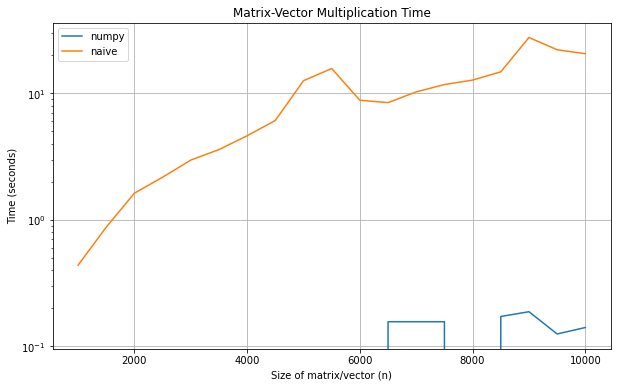

In [3]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_values, numpy_times, label='numpy')
plt.plot(n_values, naive_times, label='naive')
plt.yscale("log")
plt.xlabel('Size of matrix/vector (n)')
plt.ylabel('Time (seconds)')
plt.title('Matrix-Vector Multiplication Time')
plt.legend()
plt.grid()
plt.show()

From the graph above, we can see that the performance of the naive matrix-vector multiplication algorithm is much worse than that of NumPy's `dot` function, which is specially optimized for these types of operations. This difference in performance becomes especially noticeable as the size of the matrix and vector increases.



# Exercise:
Add to the above comparison the cost of computing matrix-vector multiplication one component at a time. That is, for i = 1 to len(v) compute the scalar product between row i and v, appending each result to a list to get the final vector Av.